In [1]:
library(RDataCubeReader)
library(grid)
cubepath   <- "/Users/fgans/scratch/my-cablab-cube/"
cube  <- open.cube(cubepath)

In [2]:
?cube.read

cube.read {RDataCubeReader},R Documentation
cube,Datacube handle as returned from cube.open
variable,"A list of variables to read, defaults to all available variables"
time,Start and end time of the range to be read given as POSIXlt or POSIXct. Default is the whole datacube time range
longitude,"Longitude range , default is c(-180,180)"
latitude,"Latitude range, default is c(-90,90)"


In [3]:
cube$data.dir.entries

[1] "BurntArea" "Emission"  "Precip"

In [4]:
time<-as.POSIXlt(c("2001-01-01","2001-01-01"))

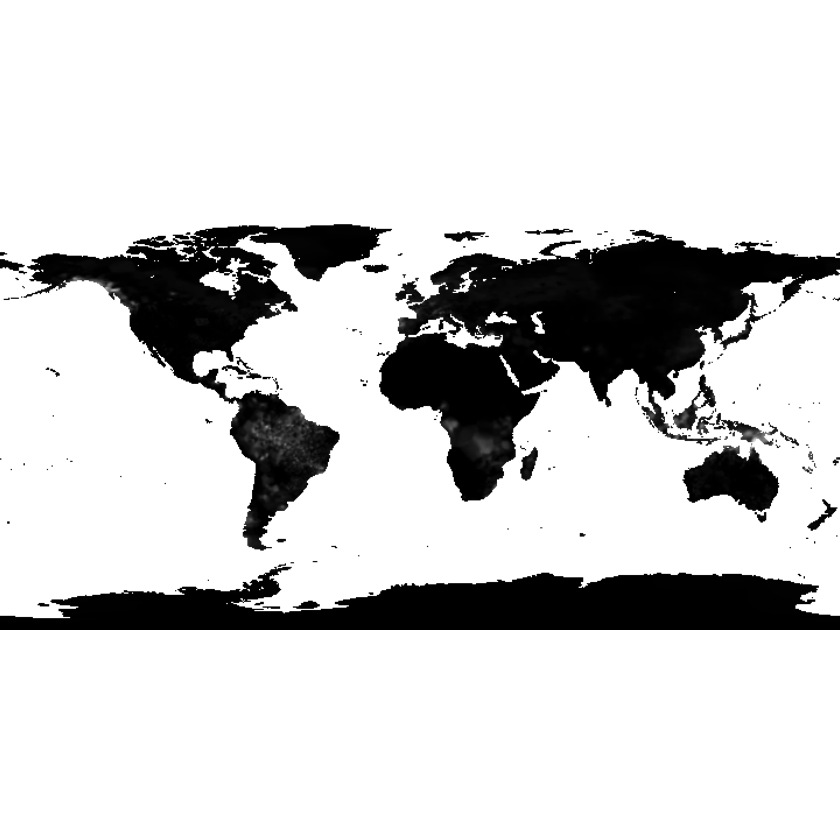

In [5]:
#Read a single map
x<-cube.read(cube,"Precip",time)
x$Precip[x$Precip<0]<-NA
grid.raster(t(x$Precip/max(x$Precip,na.rm=T)))

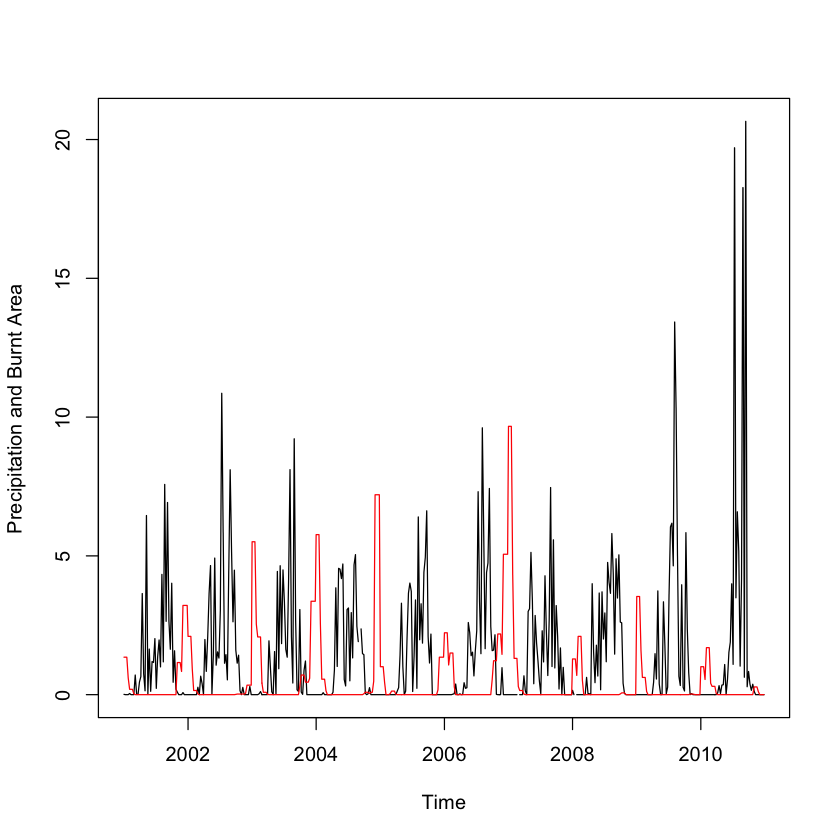

In [6]:
#Read the whole time series for a region
t <-getTimeRanges(cube)
x <-cube.read(cube,variable = c("Precip","BurntArea"),latitude = c(0,10),longitude = c(10,20))
x$Precip[x$Precip<0] <-NA
plot(t,x$Precip[3,3,],"l",xlab="Time",ylab="Precipitation and Burnt Area")
lines(t,x$BurntArea[3,3,]/1000,col=2)